In [1]:
# Only use the features before the student start studying

import pandas as pd
import numpy as np

df =pd.read_csv('data/data1.csv', index_col=[0])
df

,Course_Group,Mode_Group,pre_q_group,ord_group,Mq_Group,Fq_Group,Mo_Group,Fo_Group,Previous qualification (grade),Admission grade,Displaced,Debtor,Gender,Scholarship holder,Age at enrollment,Marital status,Daytime/evening attendance\t,Target
0,Mid1,Mid,1,0.0,Mid,Mid,Mid2,Mid2,122.0,127.3,1,0,1,0,20,1,1,Dropout
1,Mid1,High,1,0.0,Mid,Mid,Mid2,Mid2,160.0,142.5,1,0,1,0,19,1,1,Graduate
2,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid2,122.0,124.8,1,0,1,0,19,1,1,Dropout
3,Mid2,Mid,1,0.0,High,Mid,Mid2,Mid2,122.0,119.6,1,0,0,0,20,1,1,Graduate
4,Mid2,Low,1,0.0,Mid,High,Mid2,Mid2,100.0,141.5,0,0,0,0,45,2,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid1,125.0,122.2,0,0,1,0,19,1,1,Graduate
4420,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid2,120.0,119.0,1,1,0,0,18,1,1,Dropout
4421,High,High,1,0.0,Mid,Mid,Mid2,Mid2,154.0,149.5,1,0,0,1,30,1,1,Dropout
4422,Mid1,High,1,0.0,Mid,Mid,Mid2,Mid1,180.0,153.8,1,0,0,1,20,1,1,Graduate


In [2]:
df.columns

Index(['Course_Group', 'Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group',
       'Fq_Group', 'Mo_Group', 'Fo_Group', 'Previous qualification (grade)',
       'Admission grade', 'Displaced', 'Debtor', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'Marital status',
       'Daytime/evening attendance\t', 'Target'],
      dtype='object')

In [5]:
# Separate the categorical and numerical features, the categorical features need to be converted binary data by onehotencoder.
# use logistic model first

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

categorical_cols = ['Course_Group', 'Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group',
       'Fq_Group', 'Mo_Group', 'Fo_Group',  'Displaced', 'Debtor', 'Gender',
       'Scholarship holder',  'Marital status','Daytime/evening attendance\t']
numeric_cols = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [6]:
# Separate train and test data

from sklearn.model_selection import train_test_split

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
# Fit the train data

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course_Group', 'Mode_Group',
                                                   'pre_q_group', 'ord_group',
                                                   'Mq_Group', 'Fq_Group',
                                                   'Mo_Group', 'Fo_Group',
                                                   'Displaced', 'Debtor',
                                                   'Gender',
                                                   'Scholarship holder',
                                                   'Marital status',
                                                   'Daytime/evening '
                                                   'attendance\t']),
                                                 ('num', StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Age at enrollment'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [8]:
# Get the test data prediction and evaluate the model

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7658402203856749
Precision: 0.7634583627539824
Recall: 0.7658402203856749
F1 Score: 0.7610627115114045

Confusion Matrix:
[[175 109]
 [ 61 381]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.62      0.67       284
    Graduate       0.78      0.86      0.82       442

    accuracy                           0.77       726
   macro avg       0.76      0.74      0.75       726
weighted avg       0.76      0.77      0.76       726



In [9]:
# Find the possiblity of each prediction

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
result = pd.DataFrame({'Value':y_test, 'Predict':y_pred, 'Probability':y_prob})
result.Probability = pd.to_numeric(result.Probability)

In [11]:
# Machine learning model hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Same preprocessor from earlier
clf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=3000))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(
    clf2,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV score: 0.7558730322387708


In [3]:
# Try Lightgbm  (Light Gradient Boosting Machine) model 

import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    objective="binary",      # or multiclass if using 3 categories
    learning_rate=0.05,
    n_estimators=500,
    max_depth=-1,
    num_leaves=31,
    random_state=42,
)

In [13]:
# No need to do onehot encoder, but need to assign data in the categorical columns to 'categorical'

X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()


for col in categorical_cols:
    X_train_lgb[col] = X_train_lgb[col].astype("category")
    X_test_lgb[col] = X_test_lgb[col].astype("category")

In [14]:
# Fit the model
lgbm_model.fit(
    X_train_lgb,
    y_train,
    categorical_feature=categorical_cols,
    eval_set=[(X_test_lgb, y_test)],
    eval_metric="logloss",
   )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1767, number of negative: 1137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 2904, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608471 -> initscore=0.440890
[LightGBM] [Info] Start training from score 0.440890


LGBMClassifier(learning_rate=0.05, n_estimators=500, objective='binary',
               random_state=42)

In [15]:
# Evaluate the model, it is not as good as the logistic model

y_pred = lgbm_model.predict(X_test_lgb)
y_prob = lgbm_model.predict_proba(X_test_lgb)[:, 1]   # probability of class 1

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
Precision: 0.7240853567033825
Recall: 0.7272727272727273
F1 Score: 0.7248610096822068

Confusion Matrix:
[[173 111]
 [ 87 355]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.67      0.61      0.64       284
    Graduate       0.76      0.80      0.78       442

    accuracy                           0.73       726
   macro avg       0.71      0.71      0.71       726
weighted avg       0.72      0.73      0.72       726



In [19]:
# MHyperparameter tuning, used the optuna module

import optuna
import warnings
from sklearn.model_selection import cross_val_score

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'f1',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0)
    }
    
    model = lgb.LGBMClassifier(**param)
    score = cross_val_score(model, X_train_lgb, y_train, cv=5, scoring='f1_weighted').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best CV score:", study.best_value)


Best params: {'num_leaves': 69, 'max_depth': 4, 'learning_rate': 0.06922102363148218, 'min_data_in_leaf': 88, 'feature_fraction': 0.6684368378282263, 'bagging_fraction': 0.918752628491489, 'bagging_freq': 10, 'lambda_l1': 2.953521039932019e-06, 'lambda_l2': 0.036914367081286655}
Best CV score: 0.7641988579893859


In [20]:
lgbm_model = lgb.LGBMClassifier(
    objective="binary",      # or multiclass if using 3 categories
    learning_rate=0.082,
    n_estimators=500,
    max_depth=4,
    num_leaves=111,
    random_state=42,
    min_data_in_leaf=96,
    feature_fraction=0.844,
    bagging_fraction=0.6384,
    bagging_freq=4,
    lambda_l1=0.00024634,
    lambda_l2=7.46157289135056e-07
)

In [21]:
lgbm_model.fit(
    X_train_lgb,
    y_train,
    categorical_feature=categorical_cols,
    eval_set=[(X_test_lgb, y_test)],
    eval_metric="logloss",
   )

LGBMClassifier(bagging_fraction=0.6384, bagging_freq=4, feature_fraction=0.844,
               lambda_l1=0.00024634, lambda_l2=7.46157289135056e-07,
               learning_rate=0.082, max_depth=4, min_data_in_leaf=96,
               n_estimators=500, num_leaves=111, objective='binary',
               random_state=42)

In [22]:
# The performance is better after tuning, but still not as good as logistic model

y_pred = lgbm_model.predict(X_test_lgb)
y_prob = lgbm_model.predict_proba(X_test_lgb)[:, 1]   # probability of class 1

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7451790633608816
Precision: 0.7424327203677998
Recall: 0.7451790633608816
F1 Score: 0.7430330237723022

Confusion Matrix:
[[180 104]
 [ 81 361]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.69      0.63      0.66       284
    Graduate       0.78      0.82      0.80       442

    accuracy                           0.75       726
   macro avg       0.73      0.73      0.73       726
weighted avg       0.74      0.75      0.74       726



In [24]:
# try catboost model, no need to do onehot encoding

from catboost import CatBoostClassifier, Pool

for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

In [25]:
model = CatBoostClassifier(
    iterations=500,       # number of trees
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100           # prints progress every 100 iterations
)

# Train
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

0:	learn: 0.7881473	test: 0.7855530	best: 0.7855530 (0)	total: 202ms	remaining: 1m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8140043764
bestIteration = 7

Shrink model to first 8 iterations.


In [26]:
# Evlauate the model performance, almost same as the logistic model

y_pred = model.predict(test_pool)
y_prob = model.predict_proba(test_pool)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7658402203856749
Precision: 0.7632069086335492
Recall: 0.7658402203856749
F1 Score: 0.763154486780734

Confusion Matrix:
[[184 100]
 [ 70 372]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.65      0.68       284
    Graduate       0.79      0.84      0.81       442

    accuracy                           0.77       726
   macro avg       0.76      0.74      0.75       726
weighted avg       0.76      0.77      0.76       726



In [36]:
# Hyperparamter tuning by gird searching

from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier(
    eval_metric='F1',
    random_seed=42,
    verbose=0
)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train, cat_features=categorical_cols)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best params: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best CV score: 0.7653582973058853


In [11]:
model2 = CatBoostClassifier(
    iterations=1000,       # number of trees
    learning_rate=0.01,
    depth=6,
    l2_leaf_reg= 1,
    eval_metric='F1',
    random_seed=42,
    verbose=0           # prints progress every 100 iterations
)
model2.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

In [26]:
# Slight improvement after tuning

y_pred = model2.predict(test_pool)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7658402203856749
Precision: 0.7632675583201453
Recall: 0.7658402203856749
F1 Score: 0.7633639693049582

Confusion Matrix:
[[185  99]
 [ 71 371]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.65      0.69       284
    Graduate       0.79      0.84      0.81       442

    accuracy                           0.77       726
   macro avg       0.76      0.75      0.75       726
weighted avg       0.76      0.77      0.76       726



In [ ]:
# Which model did I choose?  It is Logistic model. If almost same performance, choose the simpler model.

In [9]:
# Use Shap to find the feature importances

import shap

ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_features) + numeric_cols


X_train_transformed = clf.named_steps['preprocessor'].transform(X_train)

# Access the trained logistic model inside the pipeline
log_reg = clf.named_steps['model']

# Create SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg, X_train_transformed)

# Compute SHAP values for training data
shap_values = explainer.shap_values(X_train_transformed)

Glyph 9 (	) missing from current font.
Glyph 9 (	) missing from current font.


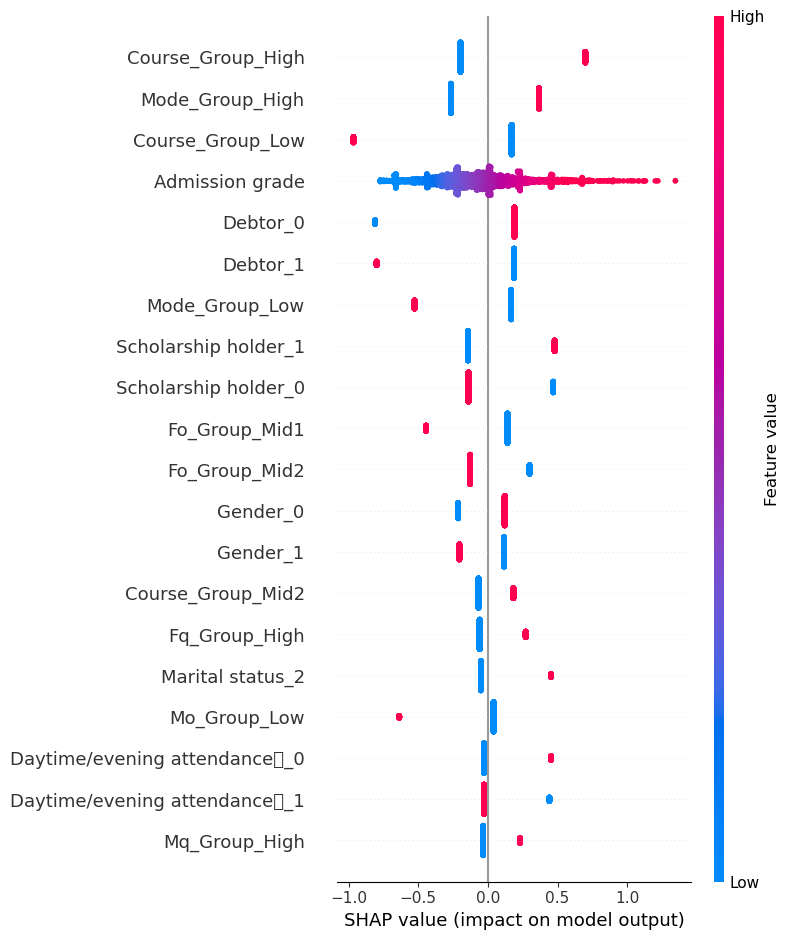

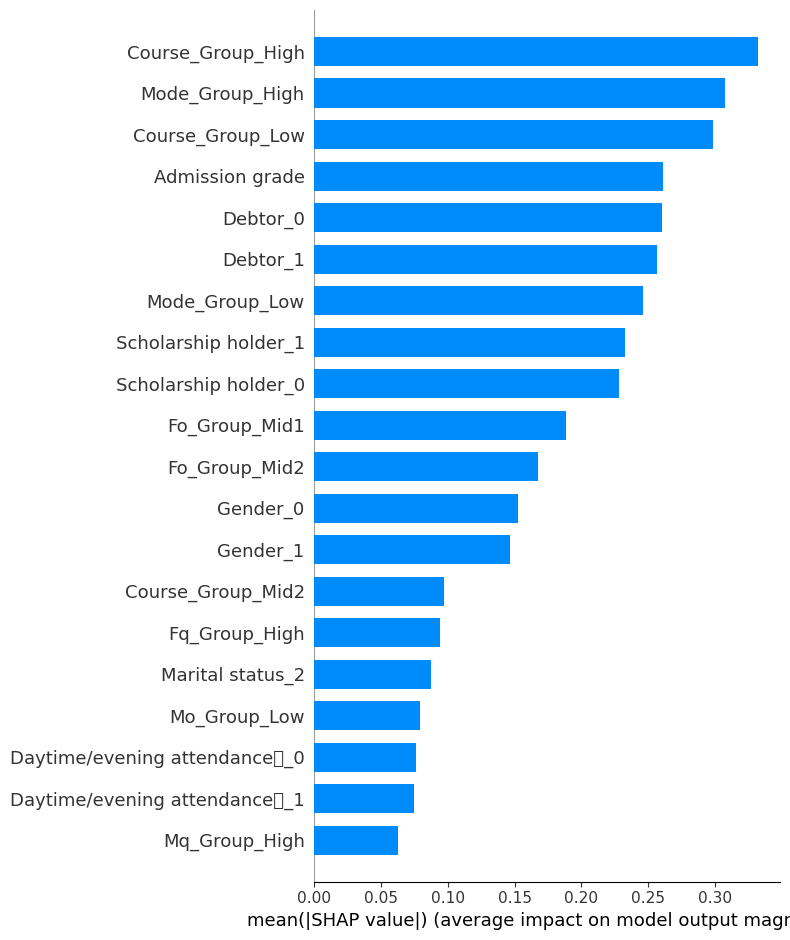

In [10]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)
shap.summary_plot(shap_values, X_train_transformed,
                  feature_names=feature_names,
                  plot_type='bar')

In [11]:
# Only select the imporant features 

categorical_cols = ['Course_Group', 'Mode_Group', 
        'Mo_Group', 'Fo_Group',   'Debtor', 'Gender',
       'Scholarship holder',  'Marital status', 'Daytime/evening attendance\t']
numeric_cols = ['Admission grade']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

clf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [12]:
# Check the perforamnce of the model with reduced features
# It has almost same accuracy as the model with the full features.
# It means there was a significant amount of redudant informtion in the original data. 

clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7617079889807162
Precision: 0.7589225170227476
Recall: 0.7617079889807162
F1 Score: 0.7574760932572053

Confusion Matrix:
[[176 108]
 [ 65 377]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.73      0.62      0.67       284
    Graduate       0.78      0.85      0.81       442

    accuracy                           0.76       726
   macro avg       0.75      0.74      0.74       726
weighted avg       0.76      0.76      0.76       726

